In [1]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [4]:
import os
import pandas as pd

os.getcwd()

'/home/piai'

In [5]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

# 실습2 - 규제화 실습

In [6]:
# 73 Page
import pandas as pd
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 평가함수
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv("보험료.csv", encoding = 'euc-kr')
df.head()

,고객번호,성별,나이,BMI,자녀수,흡연여부,가입유형,납부유형,보장범위,납입기간,보험료
0,ID100001,남성,19,27.9,0,1,홈쇼핑,은행,19,40,168849
1,ID100002,여성,18,33.8,1,0,인터넷,은행,10,40,17255
2,ID100003,여성,28,33.0,3,0,상담사,카드,12,30,44494
3,ID100004,여성,33,22.7,0,0,홈쇼핑,지로,15,30,219844
4,ID100005,여성,32,28.9,0,0,인터넷,카드,9,30,38668


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    1343 non-null   object 
 1   성별      1343 non-null   object 
 2   나이      1343 non-null   int64  
 3   BMI     1343 non-null   float64
 4   자녀수     1343 non-null   int64  
 5   흡연여부    1343 non-null   int64  
 6   가입유형    1341 non-null   object 
 7   납부유형    1340 non-null   object 
 8   보장범위    1343 non-null   int64  
 9   납입기간    1343 non-null   int64  
 10  보험료     1343 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 115.5+ KB


In [9]:
df.isnull().sum()

고객번호    0
성별      0
나이      0
BMI     0
자녀수     0
흡연여부    0
가입유형    2
납부유형    3
보장범위    0
납입기간    0
보험료     0
dtype: int64

In [10]:
unique_values = df['가입유형'].value_counts() 
unique_values

인터넷    574
홈쇼핑    385
상담사    382
Name: 가입유형, dtype: int64

In [11]:
unique_values = df['납부유형'].value_counts() 
unique_values

카드    668
은행    537
지로    135
Name: 납부유형, dtype: int64

In [12]:
# 문자형 결측치 처리:pandas.DataFrame.fillna(값, inplace: 결측치 입력 후 저장 여부)
df["가입유형"].fillna("인터넷", inplace = True)
df["납부유형"].fillna("카드", inplace = True)
df.head()

,고객번호,성별,나이,BMI,자녀수,흡연여부,가입유형,납부유형,보장범위,납입기간,보험료
0,ID100001,남성,19,27.9,0,1,홈쇼핑,은행,19,40,168849
1,ID100002,여성,18,33.8,1,0,인터넷,은행,10,40,17255
2,ID100003,여성,28,33.0,3,0,상담사,카드,12,30,44494
3,ID100004,여성,33,22.7,0,0,홈쇼핑,지로,15,30,219844
4,ID100005,여성,32,28.9,0,0,인터넷,카드,9,30,38668


In [13]:
df.isnull().sum()

고객번호    0
성별      0
나이      0
BMI     0
자녀수     0
흡연여부    0
가입유형    0
납부유형    0
보장범위    0
납입기간    0
보험료     0
dtype: int64

In [14]:
# 항목 제외
df = df.drop(['고객번호'], axis = 1)
# 범주형 변수의 Dummy 변수화
df_dummy = pd.get_dummies(df, drop_first = True)
df_dummy.head()

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
0,19,27.9,0,1,19,40,168849,0,0,1,0,0
1,18,33.8,1,0,10,40,17255,1,1,0,0,0
2,28,33.0,3,0,12,30,44494,1,0,0,0,1
3,33,22.7,0,0,15,30,219844,1,0,1,1,0
4,32,28.9,0,0,9,30,38668,1,1,0,0,1


In [15]:
# 목표변수 분리
df_y = df_dummy["보험료"]
df_x = df_dummy.drop("보험료", axis = 1)

In [16]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (940, 11)
train data Y size : (940,)
test data X size : (403, 11)
test data Y size : (403,)


In [17]:
# 모델 생성
ridge = Ridge(random_state=1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)
# 절편값 확인
print(ridge.intercept_)

-23089.389342931012


In [18]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
나이,347.585030
BMI,2704.559956
자녀수,184.055239
흡연여부,164248.181593
보장범위,17039.491806
납입기간,-6180.272438
성별_여성,5639.269745
가입유형_인터넷,-2069.756522
가입유형_홈쇼핑,-5202.696186
납부유형_지로,2555.916936


<Axes: >

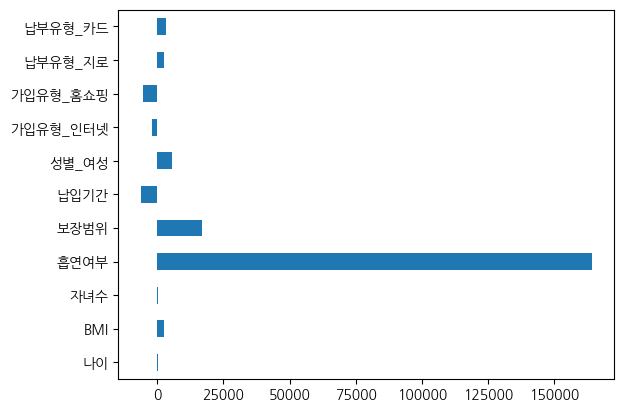

In [19]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = "Coef", legend = False)

In [20]:
# 모델의 성능
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.8182134778094339
test data의 결정계수: 0.8049961579300158


In [21]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 [374129.3883854  331434.83568755  37335.41204225  63487.06790589
  99865.45844219  68493.3860881  152008.93891256  60390.62607773
 262343.65553396 344890.34368431]


In [22]:
# 모델 생성
lasso = Lasso(random_state=1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)
# 절편값 확인
print(lasso.intercept_)

-22054.14658117792


In [23]:
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef": lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

,Coef
나이,358.847372
BMI,2708.378984
자녀수,291.704126
흡연여부,166477.749216
보장범위,16775.782649
납입기간,-6146.040050
성별_여성,5476.552953
가입유형_인터넷,-2044.043158
가입유형_홈쇼핑,-5256.045523
납부유형_지로,2561.011134


<Axes: >

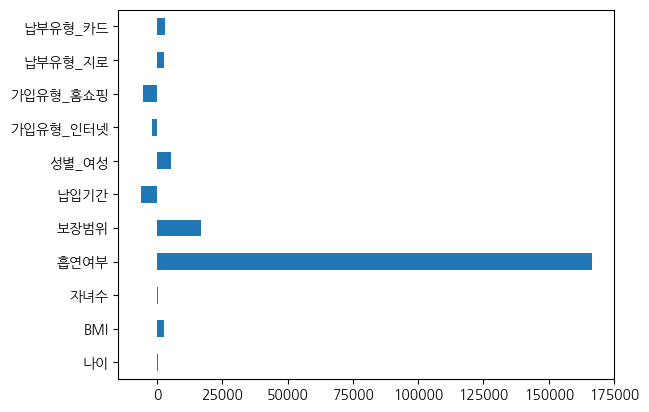

In [24]:
# 회귀계수 그래프
df_lasso_coef.plot.barh(y = "Coef", legend = False)

In [25]:
# 모델의 성능
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.8182394265973725
test data의 결정계수: 0.8046442074370032


In [26]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 [375474.19897865 332331.2125624   37308.83560455  63687.73769695
  99145.56525093  68081.2842955  151649.74060197  60052.81921028
 263649.55902548 346108.02077214]


In [27]:
# 모델 생성
elastic = ElasticNet(random_state=1234, alpha = 1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)
# 절편값 확인
print(elastic.intercept_)

-89083.99513060483


In [28]:
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef": elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

,Coef
나이,-131.468424
BMI,2603.568797
자녀수,-4222.362535
흡연여부,26051.681620
보장범위,30814.572438
납입기간,-7560.680252
성별_여성,5468.911549
가입유형_인터넷,-1389.977418
가입유형_홈쇼핑,-229.119839
납부유형_지로,508.234009


<Axes: >

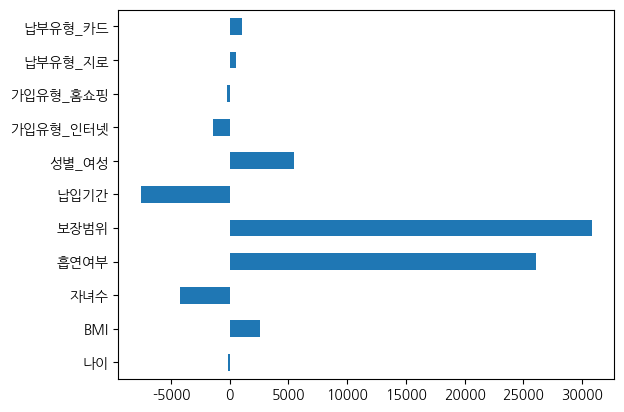

In [29]:
# 회귀계수 그래프
df_elastic_coef.plot.barh(y = "Coef", legend = False)

In [30]:
# 모델의 성능
train_pred =elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7105686943591145
test data의 결정계수: 0.7137879807324379


In [31]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 [283970.54985154 262482.54817688  34952.72390419  55175.91267142
 147977.08011173  91977.44949242 180056.74544231  79273.17339948
 182746.43213584 259290.71877182]


# 실습3 - 의사결정나무 분석 

In [32]:
# 98 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [33]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (940, 11)
train data Y size : (940,)
test data X size : (403, 11)
test data Y size : (403,)


In [34]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.947


In [35]:
tree_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [36]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [37]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.947
1,2,0.995,0.954
2,3,0.993,0.957
3,4,0.991,0.965
4,5,0.989,0.964
5,6,0.986,0.960
6,7,0.984,0.959
7,8,0.982,0.960
8,9,0.981,0.960
9,10,0.981,0.961


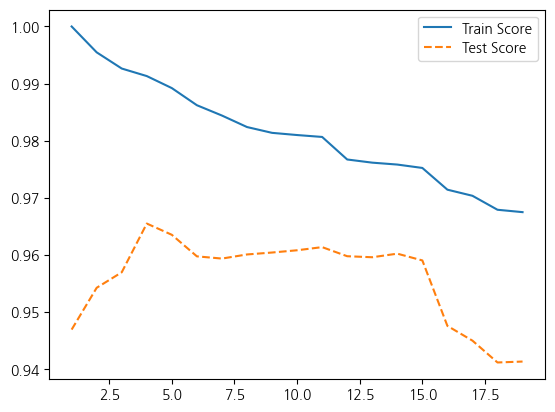

In [38]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

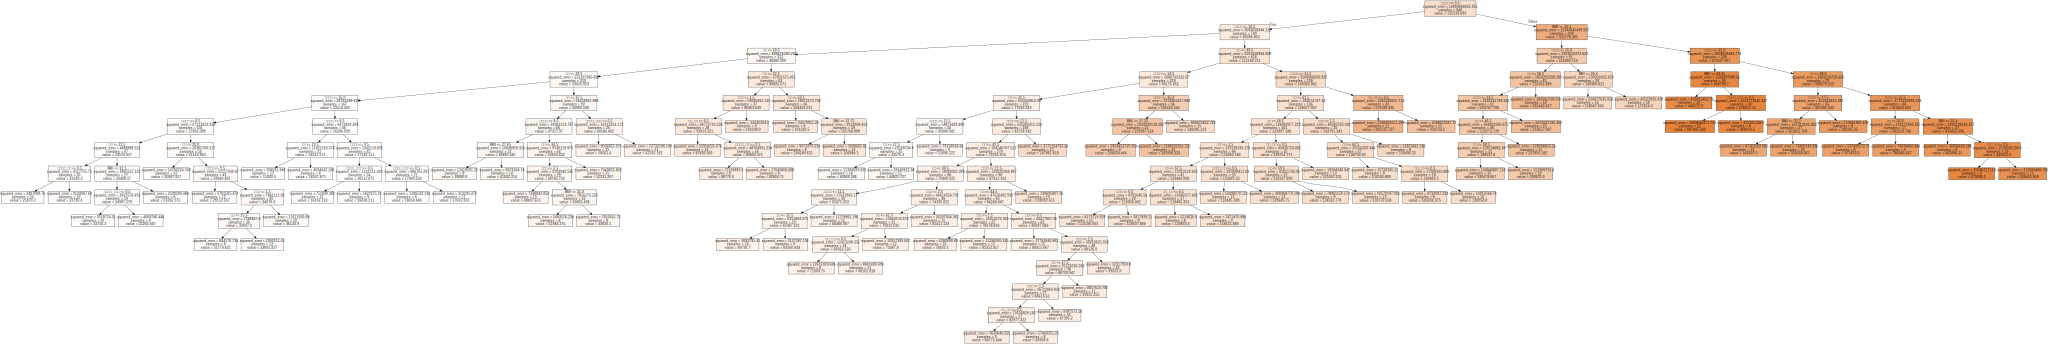

In [39]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료수 = 8 모델 
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

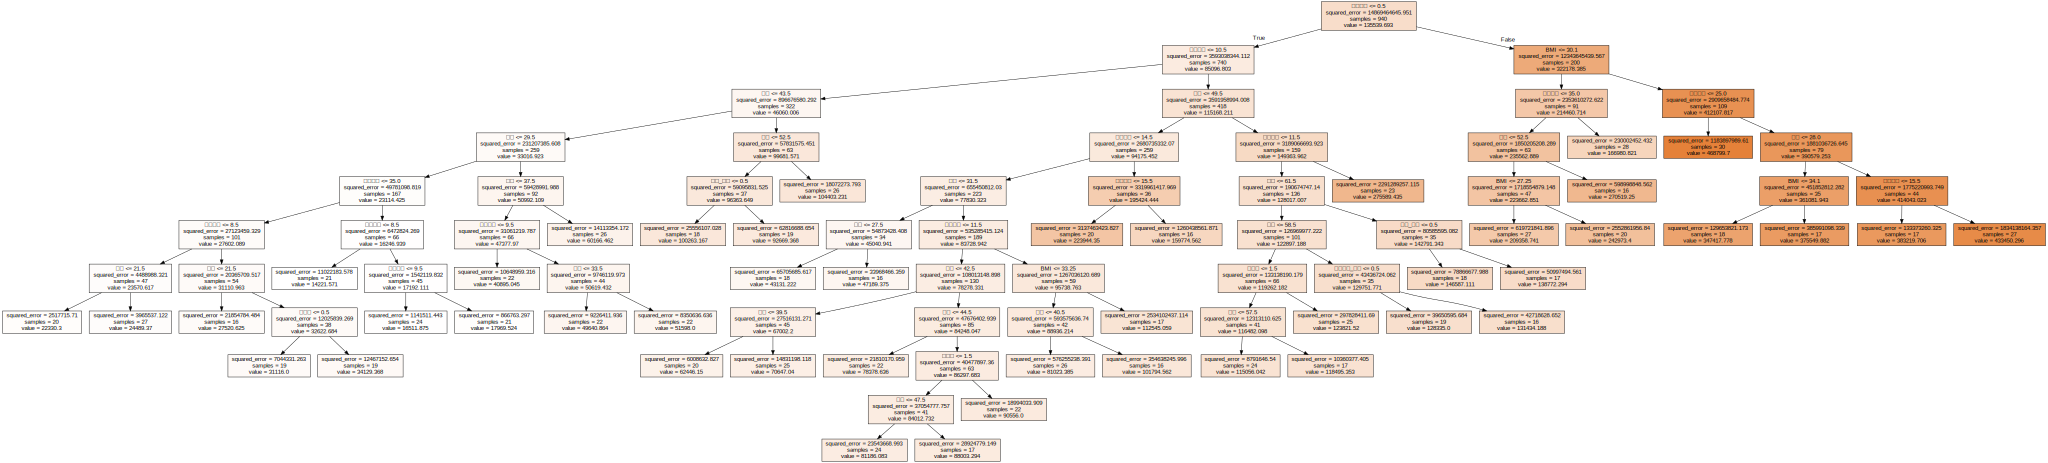

In [40]:
# 노드의 최소 자료 수=16 모델
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=16 )
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [41]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [42]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.982,0.960
1,6,0.982,0.960
2,8,0.982,0.960
3,10,0.982,0.960
4,12,0.982,0.960
5,14,0.982,0.960
6,16,0.982,0.960
7,18,0.982,0.960
8,20,0.982,0.961
9,22,0.981,0.961


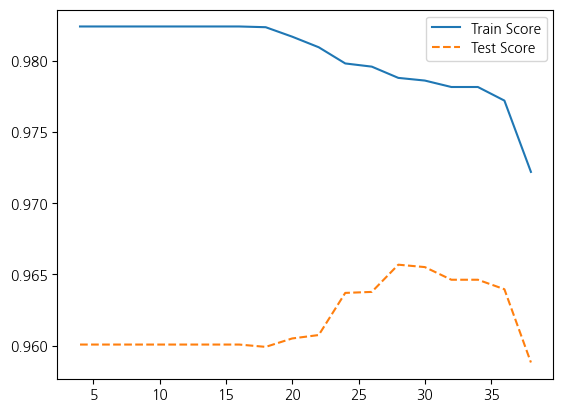

In [43]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

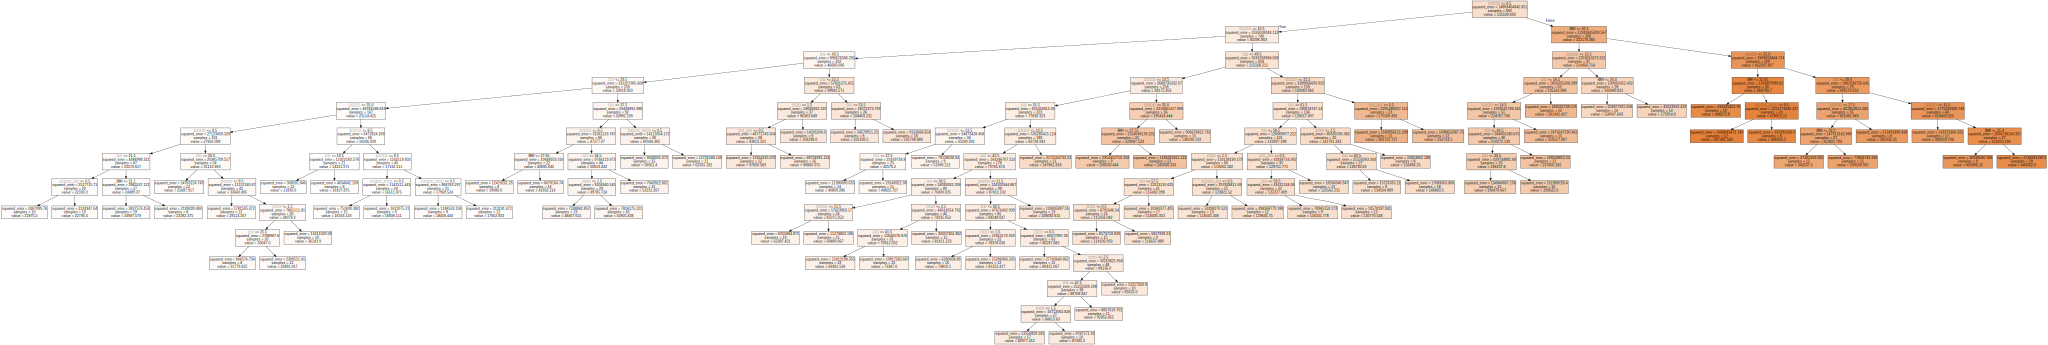

In [44]:
# 분리 노드의 최소 자료 수= 20 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20 )
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

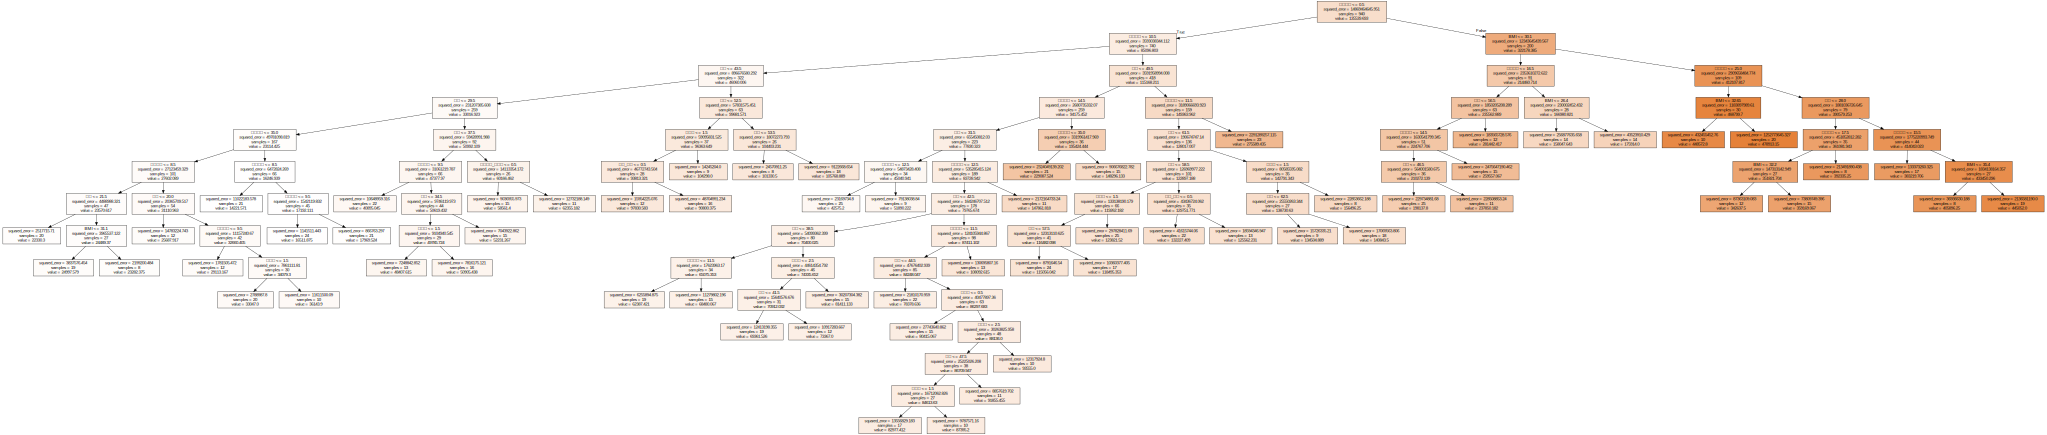

In [45]:
# 분리 노드의 최소 자료 수=26 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=26 )
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [46]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [47]:
#  모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.633,0.586
1,2,0.834,0.812
2,3,0.888,0.861
3,4,0.959,0.936
4,5,0.973,0.951
5,6,0.979,0.959
6,7,0.981,0.960
7,8,0.981,0.960
8,9,0.982,0.960
9,10,0.982,0.960


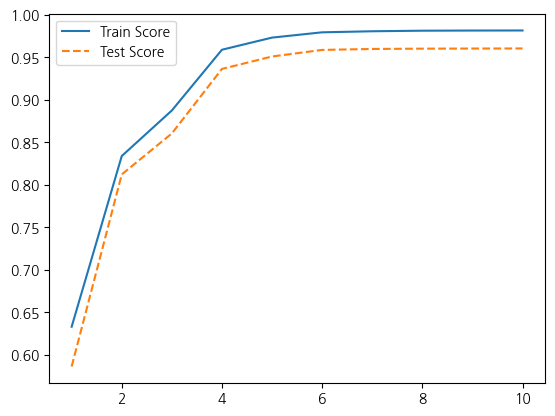

In [48]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

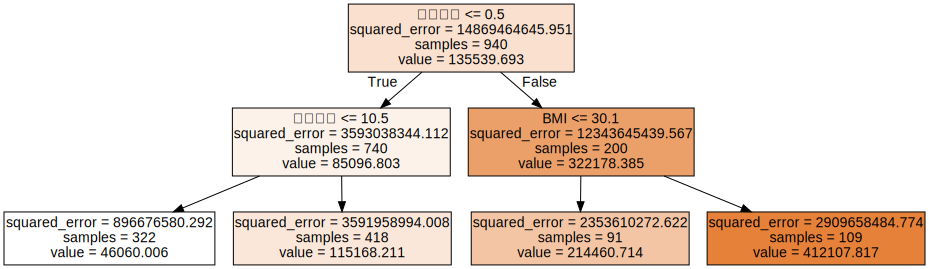

In [49]:
# 최대 깊이 = 2 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth = 2 )
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file="tree_depth.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

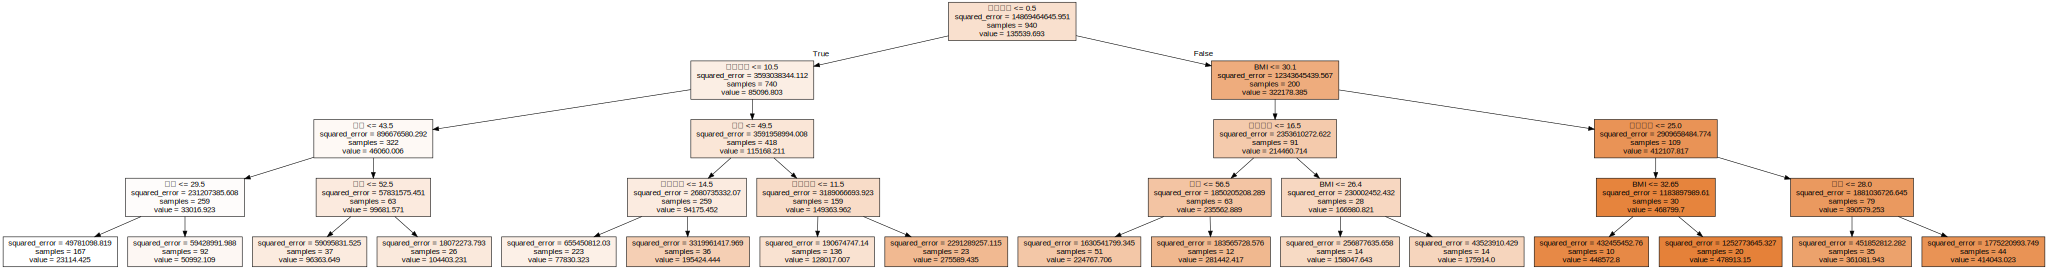

In [50]:
# 최대 깊이 = 4 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth = 4 )
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [51]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [52]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 [478913.15       414043.02272727  23114.4251497   50992.10869565
  77830.32286996  77830.32286996 128017.00735294  77830.32286996
 224767.70588235 448572.8       ]


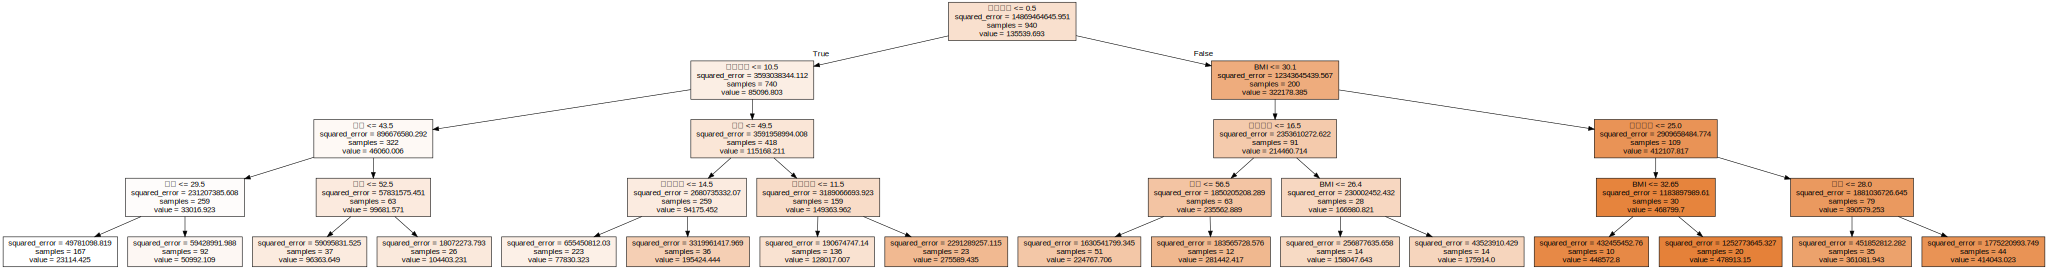

<Figure size 700x700 with 0 Axes>

In [53]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))

In [54]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,흡연여부,0.660
1,BMI,0.145
4,보장범위,0.136
0,나이,0.049
5,납입기간,0.010
2,자녀수,0.000
6,성별_여성,0.000
7,가입유형_인터넷,0.000
8,가입유형_홈쇼핑,0.000
9,납부유형_지로,0.000


Text(0, 0.5, '변수')

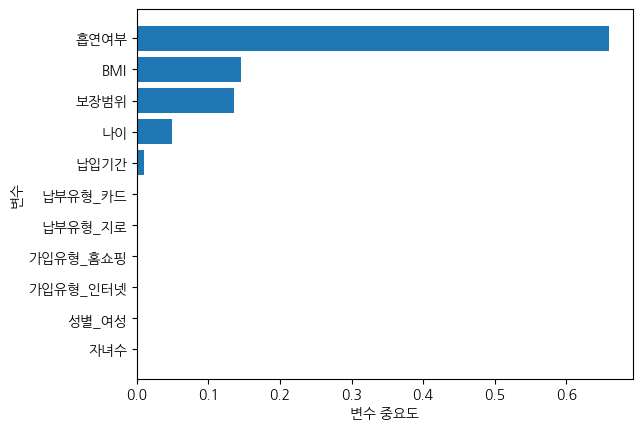

In [55]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [56]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": [None, "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=4)

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score: 
0.971


# 실습4 - 랜덤 포레스트 분석

In [57]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [58]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (940, 11)
train data Y size : (940,)
test data X size : (403, 11)
test data Y size : (403,)


In [59]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.997
Score on test set: 0.962


In [60]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [61]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [62]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.996,0.965
1,20,0.996,0.964
2,30,0.996,0.964
3,40,0.997,0.963
4,50,0.997,0.962
5,60,0.997,0.962
6,70,0.997,0.962
7,80,0.997,0.962
8,90,0.997,0.962
9,100,0.997,0.962


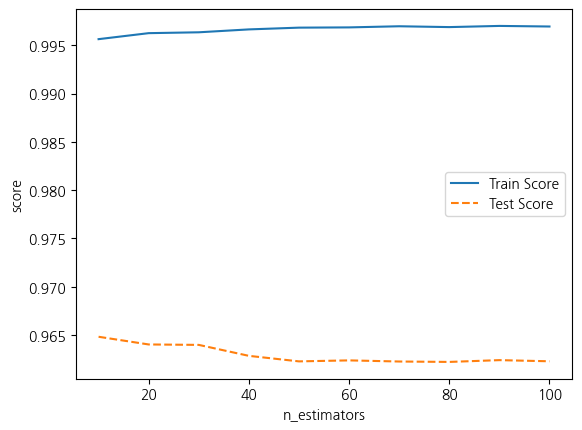

In [63]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [64]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.997,0.962
1,2,0.994,0.964
2,3,0.991,0.967
3,4,0.988,0.965
4,5,0.985,0.963
5,6,0.983,0.962
6,7,0.981,0.961
7,8,0.980,0.960
8,9,0.978,0.960
9,10,0.977,0.958


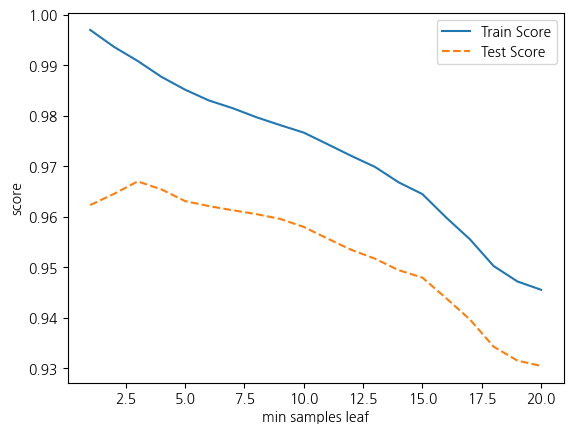

In [65]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [66]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split * 2for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.983,0.962
1,6,0.983,0.962
2,8,0.983,0.962
3,10,0.983,0.962
4,12,0.983,0.962
5,14,0.982,0.962
6,16,0.981,0.962
7,18,0.980,0.962
8,20,0.979,0.962
9,22,0.978,0.961


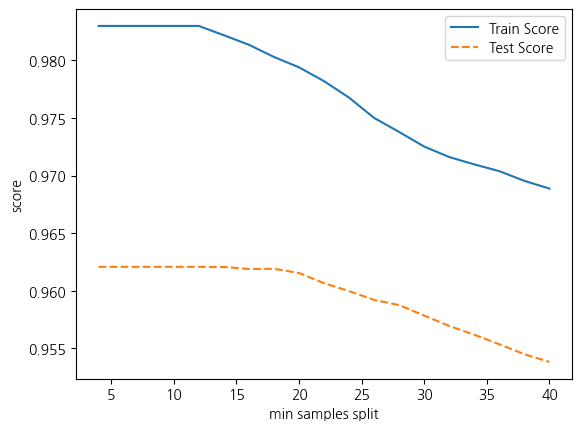

In [67]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [68]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                               min_samples_leaf = 6, min_samples_split = 14,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.633,0.587
1,2,0.854,0.833
2,3,0.935,0.916
3,4,0.968,0.950
4,5,0.979,0.959
5,6,0.981,0.961
6,7,0.982,0.962
7,8,0.982,0.962
8,9,0.982,0.962
9,10,0.982,0.962


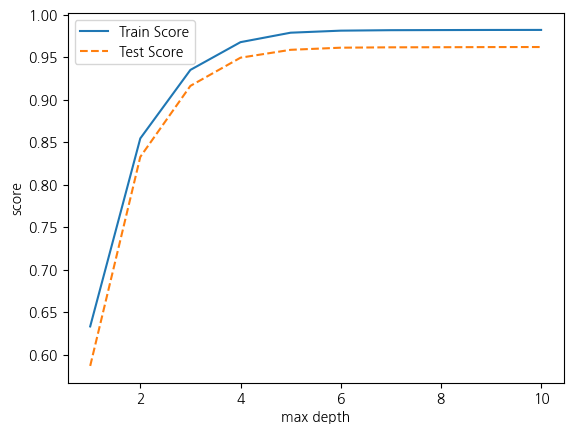

In [69]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [70]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                                 min_samples_split = 14, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.968
Score on test set: 0.950


In [71]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 [475320.25259263 414054.48446915  28511.94099747  44892.6755008
  76642.51960397  74312.09157321 132238.83597816  79703.03201894
 221933.54403925 459577.98201101]


In [72]:
# 파라미터 값 확인
rf_final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

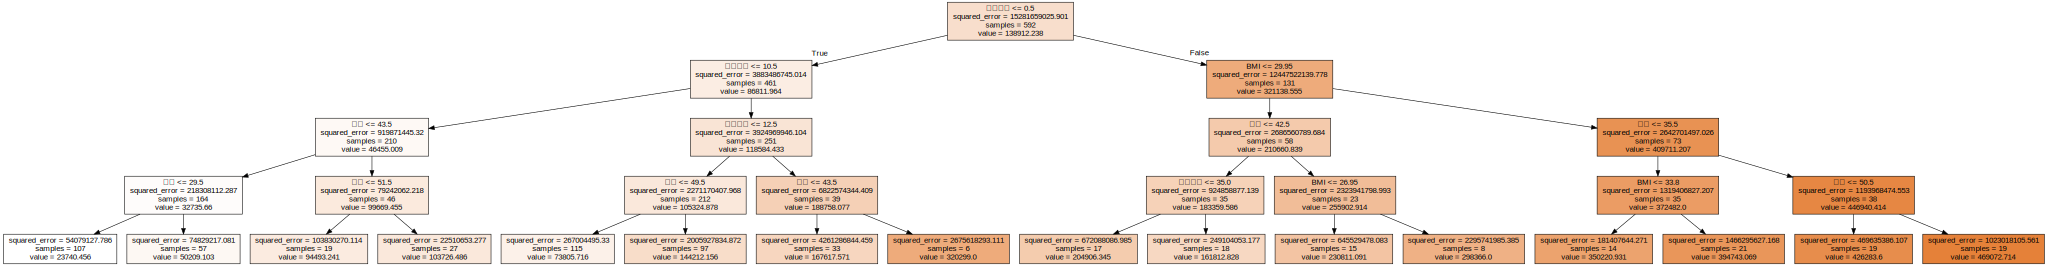

In [73]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name , 
                impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

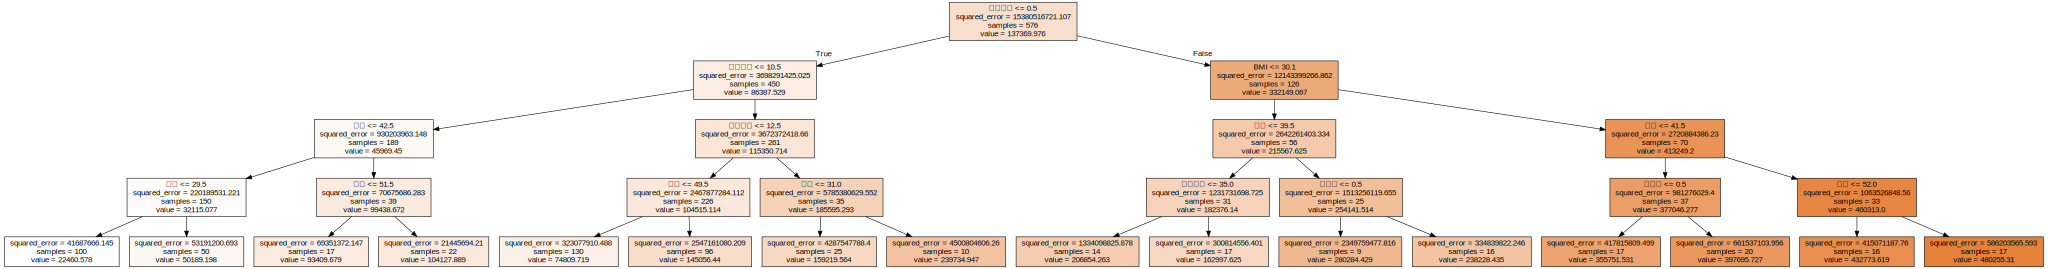

In [74]:
# 1번 트리
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", feature_names = v_feature_name , 
                impurity = True, filled = True)
# tree_final_1.dot 그리기
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

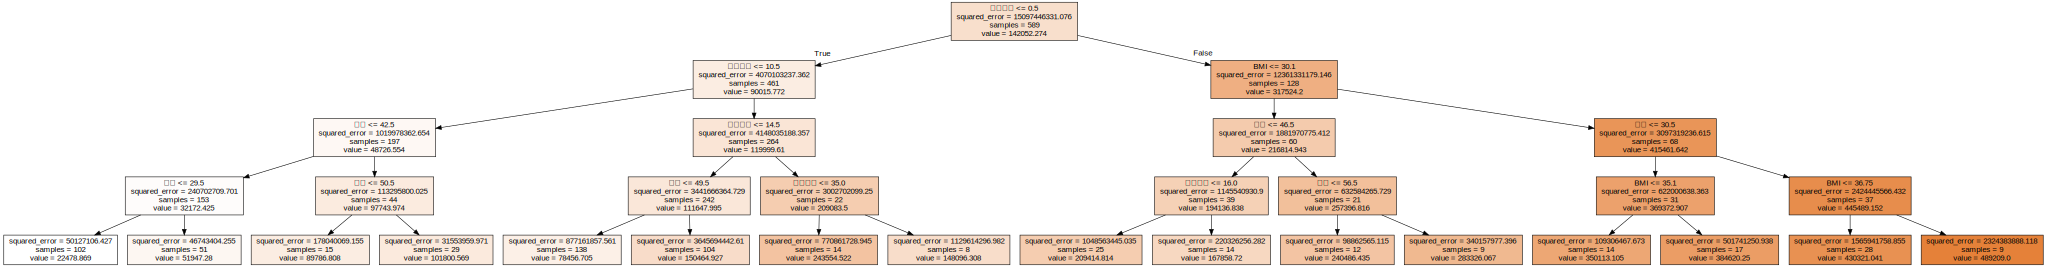

In [75]:
# 10번 트리
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot", feature_names = v_feature_name, 
                impurity = True, filled = True)
# tree_final_10.dot 그리기
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [76]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,흡연여부,0.662
1,BMI,0.147
4,보장범위,0.099
0,나이,0.079
5,납입기간,0.013
2,자녀수,0.000
6,성별_여성,0.000
7,가입유형_인터넷,0.000
10,납부유형_카드,0.000
8,가입유형_홈쇼핑,0.000


Text(0, 0.5, '변수')

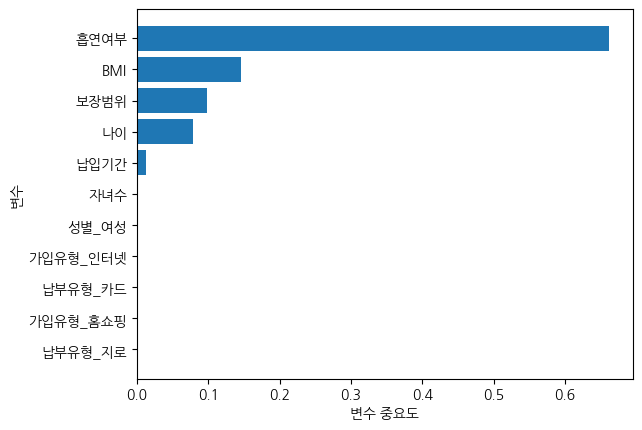

In [77]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [78]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestRegressor(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=10, min_samples_split=4, random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score: 
0.975


# 실습5 - 그래디언트 부스팅

In [79]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [80]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (940, 11)
train data Y size : (940,)
test data X size : (403, 11)
test data Y size : (403,)


In [81]:
# 모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Score on training set: 0.990
Score on test set: 0.962


In [82]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [83]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.827,0.796
1,20,0.950,0.921
2,30,0.974,0.948
3,40,0.981,0.957
4,50,0.985,0.960
5,60,0.987,0.960
6,70,0.988,0.961
7,80,0.989,0.962
8,90,0.989,0.962
9,100,0.990,0.962


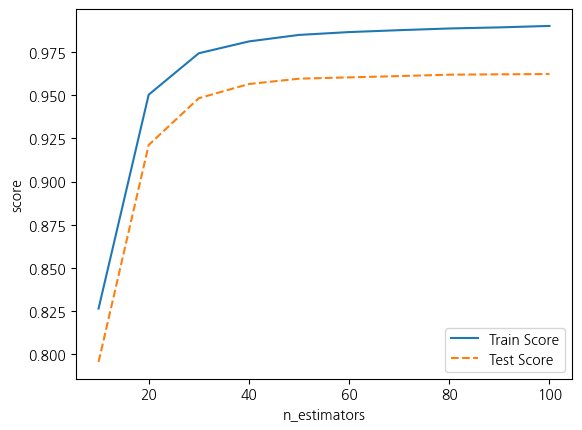

In [84]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [85]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.974,0.948
1,2,0.974,0.949
2,3,0.974,0.949
3,4,0.974,0.949
4,5,0.974,0.949
5,6,0.974,0.947
6,7,0.974,0.947
7,8,0.974,0.947
8,9,0.974,0.947
9,10,0.974,0.947


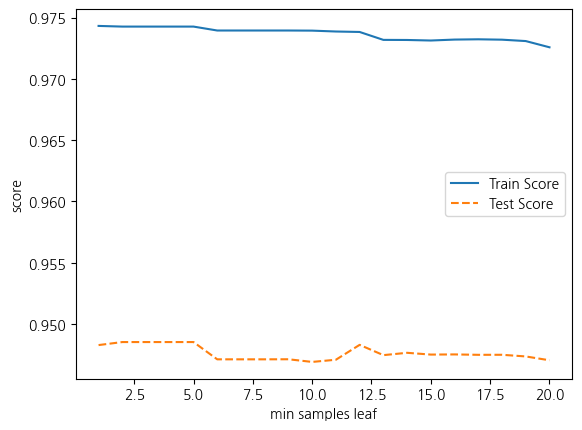

In [86]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [87]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분할하기 위한 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.974,0.947
1,4,0.974,0.947
2,6,0.974,0.947
3,8,0.974,0.947
4,10,0.974,0.947
5,12,0.974,0.947
6,14,0.974,0.947
7,16,0.974,0.947
8,18,0.974,0.947
9,20,0.974,0.947


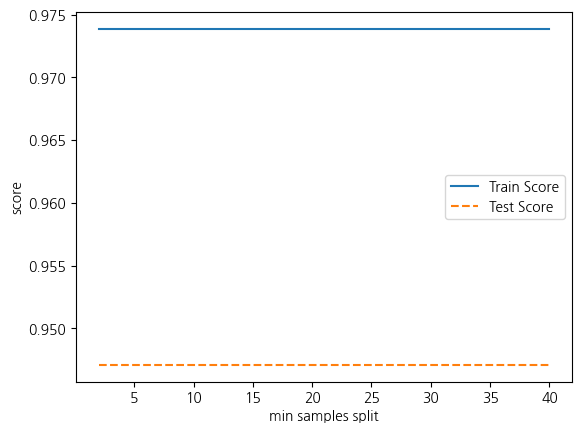

In [88]:
# 모델 설명력 그래프 확인 : 22개
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [89]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = 22, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.769,0.746
1,2,0.948,0.925
2,3,0.974,0.947
3,4,0.981,0.955
4,5,0.985,0.959
5,6,0.986,0.960
6,7,0.987,0.960
7,8,0.987,0.960
8,9,0.987,0.959
9,10,0.987,0.960


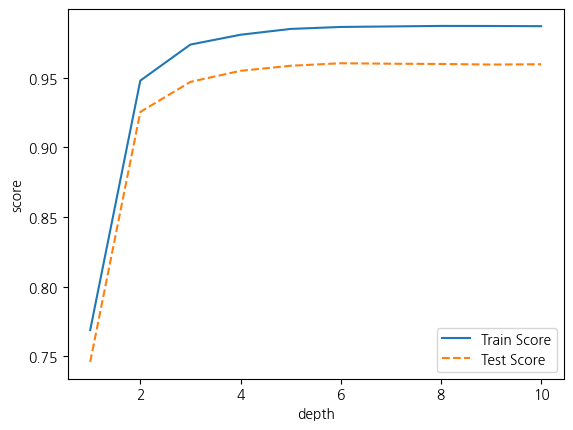

In [90]:
# 모델 설명력 그래프 확인 : 4개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

In [91]:
# learning_rate: 학습률 변경에 따른 모델 성능
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# learning rate: 학습률 변경 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                   min_samples_split = 22, max_depth = 4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.981,0.955
1,0.2,0.989,0.962
2,0.3,0.991,0.959
3,0.4,0.992,0.962
4,0.5,0.994,0.965
5,0.6,0.994,0.960
6,0.7,0.995,0.958
7,0.8,0.995,0.960
8,0.9,0.995,0.953


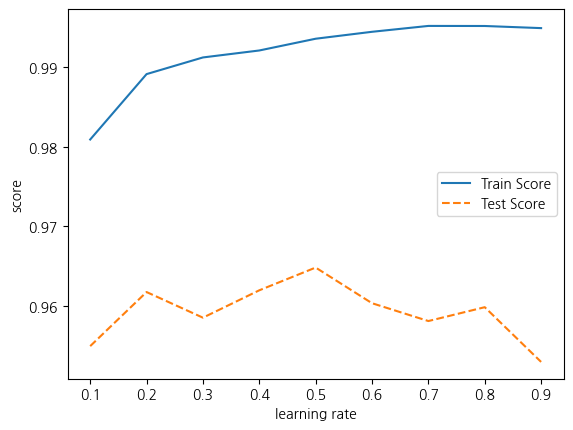

In [92]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [93]:
# 최종모델 선택
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.981
Score on test set: 0.955


In [94]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred =gb_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 1240    472698
697     402736
324      28660
237      44632
905      45641
535      60671
945     116741
900      86888
411     195948
956     419995
Name: 보험료, dtype: int64
test data의 예측값 : 
 [476721.18145747 392406.16198949  32456.29207458  47095.52747326
  66684.71185337  70915.31032307 118710.61440058  87573.29607472
 205049.6307958  423232.05472077]


In [95]:
# feature_importances_: 설명변수의 중요도
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,흡연여부,0.644
1,BMI,0.145
4,보장범위,0.115
0,나이,0.081
5,납입기간,0.014
2,자녀수,0.000
6,성별_여성,0.000
8,가입유형_홈쇼핑,0.000
9,납부유형_지로,0.000
7,가입유형_인터넷,0.000


Text(0, 0.5, '변수')

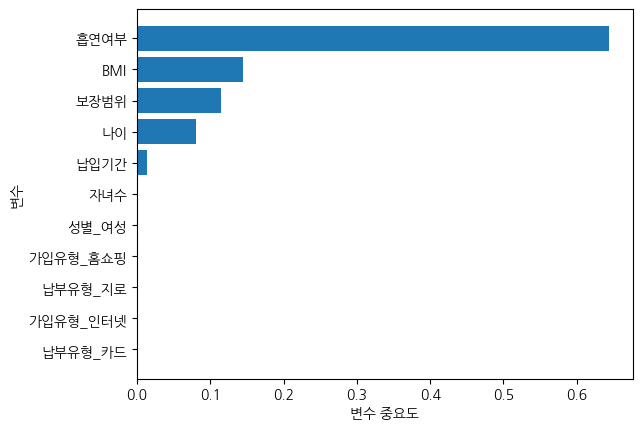

In [96]:
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [97]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": [None, "sqrt", "log2"], 
              "learning_rate": para_lr, "max_depth": para_depth, "min_samples_leaf": para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, random_state=1234)

best parameter: 
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2}

best score: 
0.978


# 실습6 - 예측모델

In [98]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [105]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train, df_test = train_test_split(df_dummy, test_size = 0.3, random_state = 1234)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y
                                                                , test_size = 0.3, random_state = 1234)

In [106]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,
                                                                test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (940, 11)
train data Y size : (940,)
test data X size : (403, 11)
test data Y size : (403,)


In [107]:
# 회귀 모델
lr_model = smf.ols(formula = "보험료 ~ 성별_여성+나이+BMI+자녀수+흡연여부+가입유형_인터넷+가입유형_홈쇼핑+납부유형_지로+납부유형_카드+보장범위+납입기간", data = df_train)
lr_result = lr_model.fit()

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4 )
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                                 min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, 
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [109]:
# 모델 리스트, 그래프를 그리기 생성 목적
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 회귀분석예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['보험료'], lr_y_pred))
rmse.append(mean_squared_error(df_test_y, lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['보험료'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['보험료'], lr_y_pred))

# 의사결정나무예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

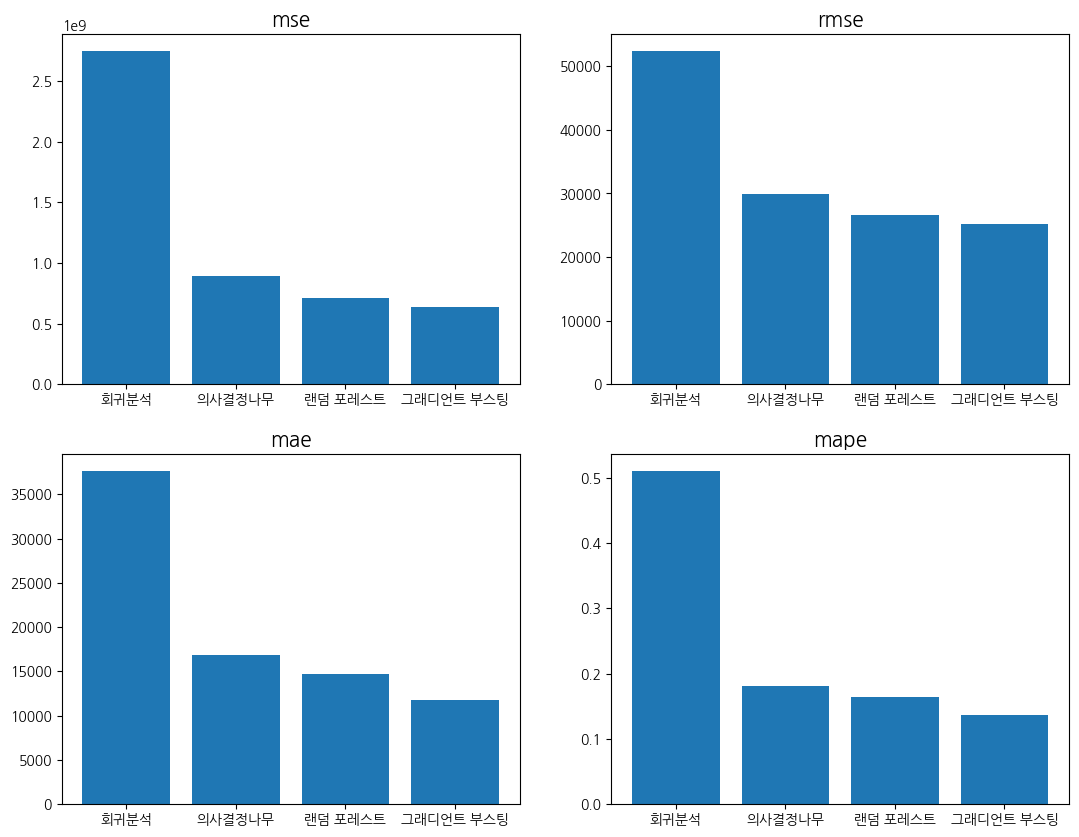

In [110]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)